In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns

sns.set()

In [2]:
users = pd.read_csv('takehome_users.csv',encoding='latin-1')
user_engagement = pd.read_csv('takehome_user_engagement.csv')

users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [3]:
# Checking columns have entries as expected
print(users.creation_source.value_counts())
print(users.opted_in_to_mailing_list.value_counts())
print(users.enabled_for_marketing_drip.value_counts())


ORG_INVITE            4254
GUEST_INVITE          2163
PERSONAL_PROJECTS     2111
SIGNUP                2087
SIGNUP_GOOGLE_AUTH    1385
Name: creation_source, dtype: int64
0    9006
1    2994
Name: opted_in_to_mailing_list, dtype: int64
0    10208
1     1792
Name: enabled_for_marketing_drip, dtype: int64


In [4]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null object
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [5]:
df = users.email.value_counts().to_frame()
temp_list = list(df[df.email==2].index)
users[users.email.isin(temp_list)].sort_values(by='email').head(10)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
1603,1604,2014-02-03 04:48:08,Lane Alfie,AlfieLane@yahoo.com,ORG_INVITE,1.391662e+09,0,0,0,4128.0
3822,3823,2012-11-22 05:51:29,Lane Alfie,AlfieLane@yahoo.com,ORG_INVITE,1.353650e+09,0,0,169,9498.0
5280,5281,2012-09-29 11:54:08,Bach Amanda,AmandaABach@gmail.com,SIGNUP_GOOGLE_AUTH,1.401883e+09,0,0,146,NaN
9040,9041,2013-01-03 00:53:47,Bach Amanda,AmandaABach@gmail.com,ORG_INVITE,NaN,0,0,377,6208.0
375,376,2012-08-10 22:27:08,Tye Jacob,JacobTye@gmail.com,SIGNUP_GOOGLE_AUTH,1.344638e+09,1,0,104,NaN
5081,5082,2013-06-25 19:31:11,Tye Jacob,JacobTye@gmail.com,SIGNUP_GOOGLE_AUTH,1.372361e+09,0,0,298,NaN
3605,3606,2013-05-10 08:31:59,Sankt Janina,JaninaSankt@gmail.com,GUEST_INVITE,1.369816e+09,0,0,84,8356.0
1169,1170,2014-04-27 16:48:34,Sankt Janina,JaninaSankt@gmail.com,ORG_INVITE,1.398617e+09,1,1,285,623.0
10153,10154,2014-05-06 10:57:37,Neudorf Kerstin,KerstinNeudorf@gmail.com,ORG_INVITE,1.400238e+09,0,0,359,4563.0
11244,11245,2014-01-17 18:05:15,Neudorf Kerstin,KerstinNeudorf@gmail.com,SIGNUP,1.389982e+09,1,1,68,NaN


##### Data Issues:
1. creation_time and last_session_creation_time are not datetime objects
2. Null values in last_session_creation_time and invited_by_user_id
3. For many of the users in users dataframe, the user_id are different but email is same. So the same user seems to have signed up for the product twice, which should not be allowed by the system. For the purpose of our analysis, we have ignored this. 

In [6]:
# Converting date columns to datetime objects
users.creation_time= pd.to_datetime(users.creation_time)
users.last_session_creation_time = pd.to_datetime(users.last_session_creation_time,unit='s')

In [7]:
# Checking data correctness by verifying last_session_creation_time is after creation_time
users[users.creation_time>users.last_session_creation_time]

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id


##### Analysing invited_by_user_id for filling NaN with appropriate values

In [8]:
users[users.invited_by_user_id.isnull()].creation_source.value_counts()

PERSONAL_PROJECTS     2111
SIGNUP                2087
SIGNUP_GOOGLE_AUTH    1385
Name: creation_source, dtype: int64

In [9]:
print(users[(users.creation_source=='PERSONAL_PROJECTS') & (users.invited_by_user_id.notnull())])
print(users[(users.creation_source=='SIGNUP') & (users.invited_by_user_id.notnull())])
print(users[(users.creation_source=='SIGNUP_GOOGLE_AUTH') & (users.invited_by_user_id.notnull())])

Empty DataFrame
Columns: [object_id, creation_time, name, email, creation_source, last_session_creation_time, opted_in_to_mailing_list, enabled_for_marketing_drip, org_id, invited_by_user_id]
Index: []
Empty DataFrame
Columns: [object_id, creation_time, name, email, creation_source, last_session_creation_time, opted_in_to_mailing_list, enabled_for_marketing_drip, org_id, invited_by_user_id]
Index: []
Empty DataFrame
Columns: [object_id, creation_time, name, email, creation_source, last_session_creation_time, opted_in_to_mailing_list, enabled_for_marketing_drip, org_id, invited_by_user_id]
Index: []


invited_by_user_id column is NaN in case user has signed up directly, without any invitation.

One thing to note is that for all creation_source = PERSONAL PROJECTS, the invited_by_user_id is NaN, when clearly, in this case the user is invited to join another user's personal workspace. So there is some disrepancy in data. Assuming it will not affect our results much, we will ignore this issue.

We will fill all NaN values in invited_by_user_id with 0.

In [10]:
# Filling NaN values in invited_by_user_id by 0
users.invited_by_user_id.fillna(0,inplace=True)

Before filling in missing values in last_session_creation_time, lets analyse user_engagment dataframe

In [11]:
user_engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [12]:
user_engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
time_stamp    207917 non-null object
user_id       207917 non-null int64
visited       207917 non-null int64
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [13]:
user_engagement.visited.value_counts()

1    207917
Name: visited, dtype: int64

As the visited column has same value, we can drop it.

In [14]:
# Dropping the column
user_engagement.drop(['visited'],axis=1,inplace=True)

# Changing time_stamp column to datetime object
user_engagement.time_stamp= pd.to_datetime(user_engagement.time_stamp)

In [15]:
user_engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 2 columns):
time_stamp    207917 non-null datetime64[ns]
user_id       207917 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.2 MB


##### Analysing last_session_creation_time for filling NaN with appropriate values 

In [16]:
# Getting the userids with missing last_session_creation_time

nan_lastdt_userid = list(users[users.last_session_creation_time.isnull()].object_id)

In [17]:
# Checking the login dates for userids with missing last_session_creation_time in users dataframe
user_engagement[user_engagement.user_id.isin(nan_lastdt_userid)]

,time_stamp,user_id


There are no login details available for the users with missing last_session_creation_time. So we will fill all missing entries with dates from creation_time, assuming that is the only time they logged into the product.

In [18]:
users.last_session_creation_time.fillna(users.creation_time,inplace=True)

In [19]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null datetime64[ns]
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    12000 non-null datetime64[ns]
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            12000 non-null float64
dtypes: datetime64[ns](2), float64(1), int64(4), object(3)
memory usage: 937.6+ KB


In [20]:
users.describe(include = 'all')

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
count,12000.00000,12000,12000,12000,12000,12000,12000.000000,12000.000000,12000.000000,12000.000000
unique,NaN,11996,11355,11980,5,11998,NaN,NaN,NaN,NaN
top,NaN,2014-02-11 17:57:53,Cavalcanti Victor,NicolaiSHolm@yahoo.com,ORG_INVITE,2014-06-04 07:46:58,NaN,NaN,NaN,NaN
freq,NaN,2,5,2,4254,2,NaN,NaN,NaN,NaN
first,NaN,2012-05-31 00:43:27,NaN,NaN,NaN,2012-05-31 08:20:06,NaN,NaN,NaN,NaN
last,NaN,2014-05-30 23:59:19,NaN,NaN,NaN,2014-06-06 14:58:50,NaN,NaN,NaN,NaN
mean,6000.50000,NaN,NaN,NaN,NaN,NaN,0.249500,0.149333,141.884583,3188.691333
std,3464.24595,NaN,NaN,NaN,NaN,NaN,0.432742,0.356432,124.056723,3869.027693
min,1.00000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
25%,3000.75000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,29.000000,0.000000


Let us check if the user and inviting user belong to the same group

In [21]:
u1=users[['object_id','org_id','invited_by_user_id']].copy()
r1=users[['object_id','org_id']].copy()
df = pd.merge(u1,r1,how='left',left_on='invited_by_user_id',right_on='object_id')
df.head()

,object_id_x,org_id_x,invited_by_user_id,object_id_y,org_id_y
0,1,11,10803.0,10803.0,11.0
1,2,1,316.0,316.0,1.0
2,3,94,1525.0,1525.0,94.0
3,4,1,5151.0,5151.0,1.0
4,5,193,5240.0,5240.0,193.0


In [22]:
df[(df.org_id_x!=df.org_id_y) & (df.invited_by_user_id!=0)]

,object_id_x,org_id_x,invited_by_user_id,object_id_y,org_id_y


Above empty dataframe indicates that the users and their reference belong to the same group.

### Feature Engineering

We will add 2 columns:
1. org_size = Number of users in each organization
2. referred = if the user was invited to sign in then True else False

In [23]:
# Adding org_size
temp = users.org_id.value_counts()
users['org_size'] = [temp[i] for i in users.org_id]

# Adding referred
users['referred'] = users.invited_by_user_id!=0

users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,org_size,referred
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,75,True
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,233,True
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,32,True
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,233,True
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,16,True


An "adopted user" is a user who has logged into the product on three separate days in at least one seven-day period. We will add a column for adopted user with boolean values - True for adopted user, False otherwise.

In [24]:
def get_visit_count(grp, freq):
    return grp.rolling(freq, on='time_stamp')['user_id'].count()

user_engagement['7_day_visit'] = user_engagement.groupby('user_id', as_index=False, group_keys=False).apply(get_visit_count, '7D')

# Creating a data frame with adopted_user status against the user_id
df_adopted = user_engagement.groupby('user_id')['7_day_visit'].max().to_frame().reset_index()
df_adopted['adopted_user'] = (df_adopted['7_day_visit']>2)
df_adopted.head()

,user_id,7_day_visit,adopted_user
0,1,1.0,False
1,2,3.0,True
2,3,1.0,False
3,4,1.0,False
4,5,1.0,False


In [25]:
# Merging 2 dataframes

df = pd.merge(users,df_adopted,how='outer',left_on='object_id',right_on='user_id').drop(['user_id','7_day_visit'],axis=1)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 13 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null datetime64[ns]
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    12000 non-null datetime64[ns]
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            12000 non-null float64
org_size                      12000 non-null int64
referred                      12000 non-null bool
adopted_user                  8823 non-null object
dtypes: bool(1), datetime64[ns](2), float64(1), int64(5), object(4)
memory usage: 1.2+ MB


adopted_user is NaN only for the cases where user did not login. For such cases, we will fill NaN with False.

In [27]:
df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,org_size,referred,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,75,True,False
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,233,True,True
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,32,True,False
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,233,True,False
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,16,True,False


In [28]:
df.adopted_user.fillna(False,inplace=True)

# Adding one more column for checking if the reference user is adopted
df = pd.merge(df,df[['object_id','adopted_user']], how='left',left_on='invited_by_user_id',right_on='object_id')
df.drop('object_id_y',axis=1,inplace=True)
df.rename(columns={'object_id_x':'object_id','adopted_user_x':'adopted_user','adopted_user_y':'adopted_reference'},inplace=True)
df.adopted_reference.fillna(False,inplace=True)
df.head()


,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,org_size,referred,adopted_user,adopted_reference
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,75,True,False,False
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,233,True,True,False
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,32,True,False,True
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,233,True,False,True
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,16,True,False,True


(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

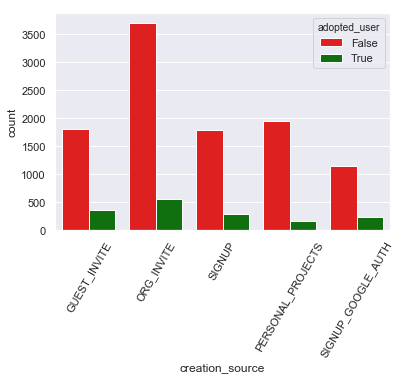

In [29]:
sns.countplot(x="creation_source", data=df,hue='adopted_user',palette=['red','green'])
plt.xticks(rotation=60)

In [30]:
def plot_login(df):
    login_count = df.creation_time.to_frame()
    login_count.index = login_count.creation_time
    return login_count.resample("M").count()

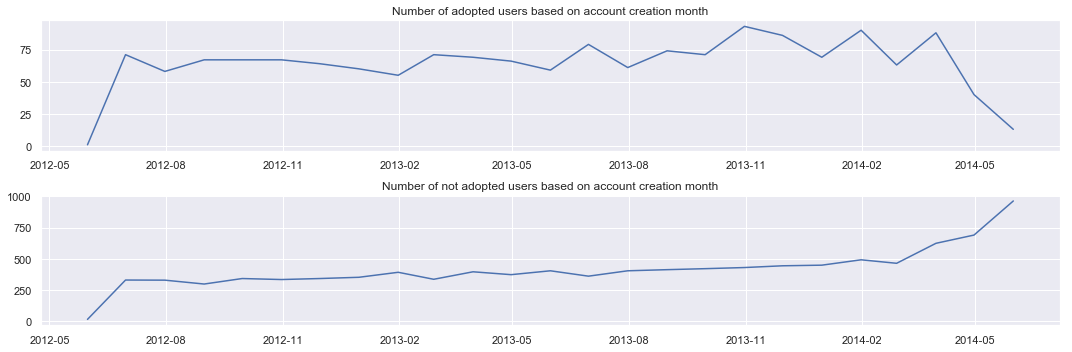

In [31]:
adopted_monthly_count = plot_login(df[df.adopted_user==True])
not_adopted_monthly_count = plot_login(df[df.adopted_user==False])

fig = plt.figure(figsize=(15, 5))
plt.subplot(2,1,1)
plt.plot(adopted_monthly_count)
plt.title('Number of adopted users based on account creation month')

plt.subplot(2,1,2)
plt.plot(not_adopted_monthly_count)
plt.title('Number of not adopted users based on account creation month')

plt.tight_layout()

For new users, the adoption rate seems to be going down, the reason of which is that they are not old  enough to fulfil the criteria for adoption. 

In [32]:
df.drop(['object_id','creation_time','name','email','last_session_creation_time',],axis=1,inplace=True)

In [33]:
df_users = pd.get_dummies(df)
df_users.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,org_size,referred,adopted_user,adopted_reference,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
0,1,0,11,10803.0,75,True,False,False,1,0,0,0,0
1,0,0,1,316.0,233,True,True,False,0,1,0,0,0
2,0,0,94,1525.0,32,True,False,True,0,1,0,0,0
3,0,0,1,5151.0,233,True,False,True,1,0,0,0,0
4,0,0,193,5240.0,16,True,False,True,1,0,0,0,0


In [34]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 13 columns):
opted_in_to_mailing_list              12000 non-null int64
enabled_for_marketing_drip            12000 non-null int64
org_id                                12000 non-null int64
invited_by_user_id                    12000 non-null float64
org_size                              12000 non-null int64
referred                              12000 non-null bool
adopted_user                          12000 non-null bool
adopted_reference                     12000 non-null bool
creation_source_GUEST_INVITE          12000 non-null uint8
creation_source_ORG_INVITE            12000 non-null uint8
creation_source_PERSONAL_PROJECTS     12000 non-null uint8
creation_source_SIGNUP                12000 non-null uint8
creation_source_SIGNUP_GOOGLE_AUTH    12000 non-null uint8
dtypes: bool(3), float64(1), int64(4), uint8(5)
memory usage: 976.2 KB


In [35]:
X = df_users.drop(labels=['adopted_user'],axis=1)
y = df_users.adopted_user

As we have to find the features that predict user adoption, and not predict user adoption, we will not split our dataset in training and testing sets.

In [36]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Applying SelectKBest class to score the 12 features
bestfeatures = SelectKBest(score_func=chi2, k=12)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

# Concatenating two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
print(featureScores.nlargest(12,'Score'))


                                 Specs         Score
3                   invited_by_user_id  26272.387638
4                             org_size   6142.446090
2                               org_id   5418.462606
9    creation_source_PERSONAL_PROJECTS     56.844560
6                    adopted_reference     49.064999
7         creation_source_GUEST_INVITE     20.283149
11  creation_source_SIGNUP_GOOGLE_AUTH     13.848040
5                             referred      4.274697
10              creation_source_SIGNUP      0.857191
0             opted_in_to_mailing_list      0.590515
8           creation_source_ORG_INVITE      0.451700
1           enabled_for_marketing_drip      0.220970


C:\Users\sony\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.02081171 0.01793471 0.39468014 0.28255578 0.2575316  0.0009723
 0.00877381 0.0029696  0.00316923 0.00741626 0.00144862 0.00173625]


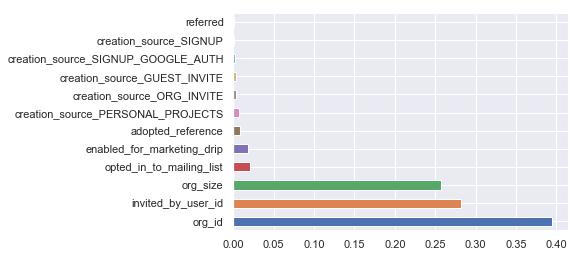

In [37]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)

# Plotting graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

From the above 2 methods, the 3 most important features are the organization (group of users) they belong to, organization size and invited_by_user. Let's verify this using the heatmap

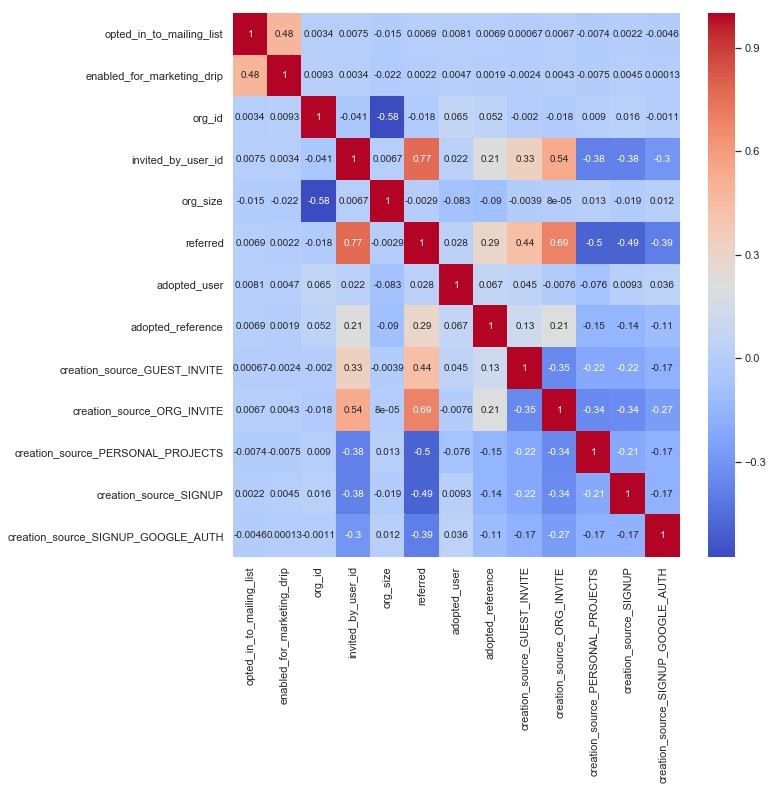

In [38]:
#get correlations of each features in dataset
corrmat = df_users.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(df_users[top_corr_features].corr(),annot=True,cmap="coolwarm")

In [39]:
from scipy import stats

# Function for calculating p-value matrix for multiple variables

def calculate_pvalues(df):
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            df_clean = df.loc[:,[r,c]].dropna()
            pvalues[r][c]=round(stats.spearmanr(df_clean.iloc[:,0], df_clean.iloc[:,1])[1], 4)
    return pvalues

calculate_pvalues(df_users)

,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,org_size,referred,adopted_user,adopted_reference,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
opted_in_to_mailing_list,0,0,0.5128,0.3912,0.4037,0.4476,0.3751,0.4497,0.9418,0.4634,0.4156,0.8112,0.6178
enabled_for_marketing_drip,0,0,0.2437,0.7302,0.3043,0.8082,0.6103,0.8322,0.7894,0.64,0.4102,0.6199,0.9889
org_id,0.5128,0.2437,0,0.0023,0,0.1445,0,0,0.9867,0.1315,0.6484,0.0563,0.5964
invited_by_user_id,0.3912,0.7302,0.0023,0,0.0129,0,0.0053,0,0,0,0,0,0
org_size,0.4037,0.3043,0,0.0129,0,0.1256,0,0,0.9147,0.0923,0.9442,0.0144,0.6689
referred,0.4476,0.8082,0.1445,0,0.1256,0,0.0024,0,0,0,0,0,0
adopted_user,0.3751,0.6103,0,0.0053,0,0.0024,0,0,0,0.4029,0,0.3084,0.0001
adopted_reference,0.4497,0.8322,0,0,0,0,0,0,0,0,0,0,0
creation_source_GUEST_INVITE,0.9418,0.7894,0.9867,0,0.9147,0,0,0,0,0,0,0,0
creation_source_ORG_INVITE,0.4634,0.64,0.1315,0,0.0923,0,0.4029,0,0,0,0,0,0


From the above heatmap, and the p-values, the important features are org_id, org_size, invited_by_user_id, referred, adopted_reference, creation_source_PERSONAL_PROJECTS.

### Results

The most important features are: org_id, org_size, invited_by_user_id.

### Summary & Conclusion

We see above that most important factors in user adoption are related to interaction with other groups. If the user belongs to a group, the adoption is high. The bigger the size of the group, more are the chances for adoption. Adoption is also high for a user who is invited to sign up by another user.